In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pgeocode
nomi = pgeocode.Nominatim('IN')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split as tts,cross_val_score,ShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score

In [2]:
invoice=pd.read_csv("C:\\Users\\Neel\\Desktop\\GreyAtom Capstone Project\\Final_invoice.csv")
invoice.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,...,Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,...,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,...,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,...,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [3]:
invoice.shape

(492314, 59)

In [4]:
invoice_missing=pd.DataFrame(invoice.isnull().sum()/invoice.shape[0]*100,columns=["Missing"])

#### Drop columns containing more than 60% missing values

In [5]:
invoice.drop(list(invoice_missing[invoice_missing["Missing"]>60].index),1,inplace=True)

In [6]:
invoice.shape

(492314, 52)

In [7]:
pd.set_option('display.max_columns', None)
invoice.drop(["Unnamed: 0"],1,inplace=True)
invoice.shape

(492314, 51)

In [8]:
for col in list(invoice):
    print(col,":",invoice[col].unique())

Amt Rcvd From Custom : [ 0. nan]
Amt Rcvd From Ins Co : [ 0. nan]
Area / Locality : ['MAJIWADA' 'THNAE' 'THANE' ... 'NEW AVADI RD' 'KOTTUR,' 'THANDURAI,']
CGST(14%) : [ 0. nan]
CGST(2.5%) : [ 0. nan]
CGST(6%) : [ 0. nan]
CGST(9%) : [ 0. nan]
CITY : ['Thane' 'THNAE' 'THANE[W]' ... 'Pattabiram' 'ayanavaram' 'saidapet']
Cust Type : ['Retail' 'Corporate others' 'Corporate- M&M' 'Fleets' 'MFCWL' 'Insurance'
 'Franchise']
Customer No. : ['67849' '84419' '81055' ... '203844' '203820' '204288']
District : ['Maharashtra' 'Madhya Pradesh' 'Karnataka' 'Andhra Pradesh' 'Telangana'
 'Tripura' 'Tamil Nadu' 'Punjab' 'Kerala' 'Puducherry' 'Gujarat' 'Haryana'
 'Dadra and Nagar Hav.' 'Daman and Diu' 'Uttar Pradesh' 'Delhi'
 'Uttarakhand' 'Chandigarh' 'Manipur' 'Himachal Pradesh'
 'Arunachal Pradesh' 'Rajasthan' 'Jammu and Kashmir' 'Megalaya' 'Bihar'
 'Jharkhand' 'West Bengal' 'Chhattisgarh' 'Nagaland' 'Sikkim' 'Goa'
 'Lakshadweep' 'Andaman and Nico.In.' 'Odisha' 'Mizoram' 'Assam']
Gate Pass Time : ['00:

Regn No : ['KA19MA1291' 'MH43R3046' 'AP09AX0582' ... 'TN22BW1485' 'TN38Y9343'
 'TN10T3317']
SGST/UGST(14%) : [ 0. nan]
SGST/UGST(2.5%) : [ 0. nan]
SGST/UGST(6%) : [ 0. nan]
SGST/UGST(9%) : [ 0. nan]
TDS amount : [ 0. nan]
Technician Name : ['RUPESH' 'PRASHANT' 'IMRAN' ... 'SADA' 'azhar/sadab/rajesh'
 'SANDEEP HARDEEP']
Total Amt Wtd Tax. : [ 4051.95  1001.29   233.14 ... 12052.14  4458.15  6832.08]
Total CGST : [ 0. nan]
Total GST : [ 0. nan]
Total IGST : [ 0. nan]
Total SGST/UGST : [ 0. nan]
Total Value : [ 4051.95  1001.29   233.14 ...  6598.74 33420.95      nan]
User ID : ['BC01FS1' 'BC01SA2' 'BC01SA1' 'BC01WM1' 'BC02SA2' 'BC02SA1' 'BC02WM1'
 'BC02FS1' 'BC03SA2' 'BC03SA4' 'BC03SA1' 'BC03SA3' 'BC03FS1' 'BC03WM1'
 'BC05SA2' 'BC05SA1' 'BC05FS1' 'BC05WM1' '23109043' 'BC06SA1' 'BC06SA2'
 'BC06FS1' 'BC07SA2' 'BC07SA1' 'BC07FS1' 'BC08FS1' 'BC08SA1' 'BC08SA2'
 'BC12SA1' 'BC12SA2' 'BC12FS1' 'BC13SA3' 'BC13SA2' 'BC13SA1' 'BC13FS1'
 'BC15SA1' 'BC15SA2' 'BC15FS1' 'BC16SA2' 'BC16SA1' 'BC16FS1' '

In [9]:
remove_cols=list(invoice_missing[(invoice_missing["Missing"]>39) & (invoice_missing["Missing"]<90)].index)

In [10]:
remove_cols.remove("ODN No.")
remove_cols.remove('Outstanding Amt')
remove_cols.remove('Technician Name')
remove_cols.remove('Total Value')

In [11]:
invoice.drop(remove_cols,1,inplace=True)
invoice.shape

(492314, 32)

In [12]:
invoice.head()

,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Amt Wtd Tax.,Total Value,User ID
0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,4051.95,BC01FS1
1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,1001.29,BC01SA2
2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,233.14,BC01SA2
3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,0.00,BC01SA2
4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,2747.12,BC01SA2


#### Convert "Invoice Date" and "Inovoice Time" to datetime format, similarly for "JobCard TIme" and "JobCard Date"

In [67]:
invoice["Invoice_DateTime"]=pd.to_datetime(invoice["Invoice Date"]+" "+invoice["Invoice Time"])
invoice["JobCard_DateTime"]=pd.to_datetime(invoice["JobCard Date"]+" "+invoice["JobCard Time"])

#### Drop columns which are already combined 

In [68]:
invoice.drop(["Invoice Date","Invoice Time","JobCard Date","JobCard Time"],1,inplace=True)

#### Calculate Service Time based on JobCard Datetime and Invoice Datetime

In [69]:
invoice["Service_Time"]=invoice["Invoice_DateTime"]-invoice["JobCard_DateTime"]

#### Drop unnecessary columns

In [70]:
invoice.drop(["Labour Total","Misc Total","OSL Total","Parts Total","Total Amt Wtd Tax."],1,inplace=True)

In [71]:
invoice.shape

(492314, 26)

#### Cleaning "Area/Locality", "City" and "District" columns 

In [72]:
invoice["Clean_CITY"]=nomi.query_postal_code(np.array(invoice["Pin code"].astype(str))).county_name
invoice["Clean_District"]=nomi.query_postal_code(np.array(invoice["Pin code"].astype(str))).state_name
invoice["Clean_Location_Area"]=nomi.query_postal_code(np.array(invoice["Pin code"].astype(str))).place_name

#### Dropping old  "Area/Locality", "City" and "District" columns 

In [73]:
invoice.drop(["Area / Locality","CITY","District"],1,inplace=True)

In [74]:
invoice.drop(["Outstanding Amt"],1,inplace=True)

In [75]:
invoice["Year"]=invoice["Invoice_DateTime"].dt.year

In [76]:
invoice.shape

(492314, 26)

#### Calculation of Life Time Value for each customer over a period of 2013-2015 (3 years) based on "Make" and "Model" of the cars for only "Running Repairs"

In [77]:
invoice_13_15=invoice[invoice["Year"].isin([2013,2014,2015])]

In [78]:
invoice_13_15.shape

(276393, 26)

In [79]:
invoice_13_15["Service_Time_Hours"]=invoice_13_15["Service_Time"]/np.timedelta64(1, 'h')

In [80]:
invoice_13_15.head()

,Cust Type,Customer No.,Gate Pass Time,Invoice No,Job Card No,KMs Reading,Make,Model,ODN No.,Order Type,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Technician Name,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,Clean_CITY,Clean_District,Clean_Location_Area,Year,Service_Time_Hours
0,Retail,67849,00:00:00,7005200002,168303,49317,GENERAL MOTORS,SPARK,7.005200e+09,Paid Service,400601,BC01,THANE,NO,0.0,KA19MA1291,RUPESH,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,Thane,Maharashtra,"Thane H.O, Thane Bazar, Thane R.S.",2015,477.014722
1,Retail,84419,00:00:00,7005200003,173997,78584,TATA MOTORS,INDICA,7.005200e+09,SMC Value Package,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,Thane,Maharashtra,"Thane East, Kopri Colony",2015,19.920556
2,Retail,81055,00:00:00,7005200004,173889,33985,MARUTI SUZUKI,ZEN,7.005200e+09,Running Repairs,400607,BC01,THANE,NO,0.0,AP09AX0582,IMRAN,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13,Thane,Maharashtra,"Chitalsar Manpada, Sandozbaugh",2015,23.536944
3,Retail,84419,00:00:00,7005200005,174158,78584,TATA MOTORS,INDICA,7.005200e+09,SMC Redemption,400603,BC01,THANE,NO,0.0,MH43R3046,PRASHANT,0.00,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12,Thane,Maharashtra,"Thane East, Kopri Colony",2015,1.470000
4,Retail,18980,00:00:00,7005200006,173860,50057,HYUNDAI,SANTRO XING,7.005200e+09,Paid Service,400603,BC01,THANE,NO,0.0,MH04CD9768,DAYANAND,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35,Thane,Maharashtra,"Thane East, Kopri Colony",2015,25.359722


In [81]:
invoice_running=invoice_13_15[invoice_13_15["Order Type"]=="Running Repairs"]
invoice_running.head()

#model_transaction=invoice_running.groupby(["Make","Model"]).agg({"Invoice No":'count',"Total Value":'mean'})
#model_transaction=model_transaction.reset_index()

customer_freq=invoice_running.groupby(["Make","Model","Clean_Location_Area","Customer No."]).agg({"Invoice No":'count',"Total Value":'mean',"Service_Time_Hours":'mean'})
customer_freq=customer_freq.reset_index()
customer_freq.head()
ltv_make_model_r=customer_freq.copy()

#ltv_make_model_r=pd.merge(customer_freq,model_transaction,on=["Make","Model"],how='left')
#ltv_make_model_r.drop(["Make_y"],1,inplace=True)
#ltv_make_model_r.head()

ltv_make_model_r["LTV (for Running Repairs)"]=ltv_make_model_r["Invoice No"]*ltv_make_model_r["Total Value"]
ltv_make_model_r.head()

,Make,Model,Clean_Location_Area,Customer No.,Invoice No,Total Value,Service_Time_Hours,LTV (for Running Repairs)
0,AUDI,A4,"Anandibazar, Ahmednagar H.O, Ahmednagar City, ...",118262,1,1754.44,0.268056,1754.44
1,AUDI,A4,Chander Nagar,58055,1,5700.48,26.655278,5700.48
2,AUDI,A4,"Charatghar, Bhatoli, Jakhera, Nangran, Mehatpu...",137682,1,359.87,0.052778,359.87
3,AUDI,A4,"Dapodi, Dapodi Bazar",11604,1,299.04,1.235278,299.04
4,AUDI,A4,Electronics City,113926,1,21834.92,28.306389,21834.92


In [82]:
ltv_make_model_r.shape

(87496, 8)

In [83]:
ltv_make_model_r["LTV (for Running Repairs)"].describe()

count     87496.000000
mean       4299.899055
std       10325.711523
min           0.000000
25%         315.060000
50%        1083.690000
75%        4209.352500
max      732727.590000
Name: LTV (for Running Repairs), dtype: float64

In [84]:
print(ltv_make_model_r[ltv_make_model_r["LTV (for Running Repairs)"]<=1083.690000].shape)
print(ltv_make_model_r[(ltv_make_model_r["LTV (for Running Repairs)"]>1083.690000)&(ltv_make_model_r["LTV (for Running Repairs)"]<=4299.899055)].shape)
print(ltv_make_model_r[ltv_make_model_r["LTV (for Running Repairs)"]>4299.899055].shape)

(43748, 8)
(22199, 8)
(21549, 8)


In [85]:
bins=[-1,1083.690000,4299.899055,732727.60]
labels=["Low","Medium","High"]
ltv_make_model_r["LTV Binned"]=pd.cut(ltv_make_model_r["LTV (for Running Repairs)"], bins=bins, labels=labels)

In [86]:
ltv_make_model_r["LTV Binned"].value_counts()

Low       43748
Medium    22199
High      21549
Name: LTV Binned, dtype: int64

In [87]:
ltv_make_model_r.dropna(inplace=True)

In [88]:
temp_ltv_make_model_r=ltv_make_model_r.copy()

In [89]:
le=LabelEncoder()
temp_ltv_make_model_r["Make"]=le.fit_transform(temp_ltv_make_model_r["Make"])
temp_ltv_make_model_r["Model"]=le.fit_transform(temp_ltv_make_model_r["Model"])
temp_ltv_make_model_r["LTV Binned"]=le.fit_transform(temp_ltv_make_model_r["LTV Binned"])
temp_ltv_make_model_r["Clean_Location_Area"]=le.fit_transform(temp_ltv_make_model_r["Clean_Location_Area"])

In [90]:
temp_ltv_make_model_r.head()

,Make,Model,Clean_Location_Area,Customer No.,Invoice No,Total Value,Service_Time_Hours,LTV (for Running Repairs),LTV Binned
0,0,8,112,118262,1,1754.44,0.268056,1754.44,2
1,0,8,424,58055,1,5700.48,26.655278,5700.48,0
2,0,8,438,137682,1,359.87,0.052778,359.87,1
3,0,8,551,11604,1,299.04,1.235278,299.04,1
4,0,8,666,113926,1,21834.92,28.306389,21834.92,0


In [91]:
X=temp_ltv_make_model_r.drop(["Customer No.","LTV (for Running Repairs)","LTV Binned","Invoice No"],1)
y=temp_ltv_make_model_r["LTV Binned"]

In [92]:
list(X)

['Make', 'Model', 'Clean_Location_Area', 'Total Value', 'Service_Time_Hours']

In [93]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=0)

In [94]:
rfc=RandomForestClassifier(criterion='entropy',random_state=0)

In [95]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [96]:
y_pred_rfc=rfc.predict(X_test)

In [97]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      6441
           1       0.92      0.99      0.95     13204
           2       0.79      0.72      0.76      6604

    accuracy                           0.88     26249
   macro avg       0.86      0.84      0.85     26249
weighted avg       0.88      0.88      0.88     26249



In [98]:
accuracy_score(y_test,y_pred_rfc)

0.8800716217760677

<BarContainer object of 5 artists>

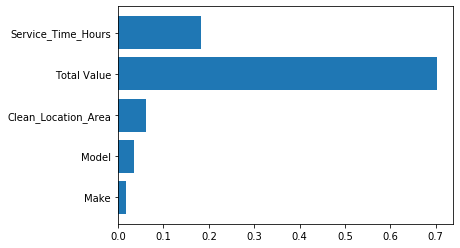

In [99]:
plt.barh(list(X),list(rfc.feature_importances_))

In [104]:
score=cross_val_score(estimator=rfc,X=X,y=y,cv=5)

In [105]:
score.mean()

0.8161989489855184

In [106]:
xgb=XGBClassifier()

In [107]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [108]:
y_pred_xgb=xgb.predict(X_test)

In [109]:
accuracy_score(y_test,y_pred_xgb)

0.891386338527182

In [110]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      6441
           1       0.91      1.00      0.95     13204
           2       0.78      0.80      0.79      6604

    accuracy                           0.89     26249
   macro avg       0.89      0.86      0.87     26249
weighted avg       0.90      0.89      0.89     26249



In [111]:
scores_xgb=cross_val_score(estimator=xgb,X=X,y=y,cv=5)

In [112]:
scores_xgb.mean()

0.8462192952505039